Artificial Neural Network

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
tf.__version__

'2.17.0'

Data preprocessing, importing dataset

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values
display(x,y)

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

array([1, 0, 1, ..., 1, 1, 0])

Encoding Categorical Data (Label encoding for the gender column and One hot encoding for geography column)

In [ ]:
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])
display(x)
he = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(he.fit_transform(x))
display(x)

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Splitting dataset into training and test sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


Feature Scaling

In [ ]:
fs = StandardScaler()
x_train = fs.fit_transform(x_train)
x_test = fs.transform(x_test)

Building the ANN

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling and Training the ANN

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(x_train, y_train, batch_size=32, epochs=100)




Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7384 - loss: 0.5810
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4773
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4469
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.4469
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.4358
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4452
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.4263
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8142 - loss: 0.4239
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8092 - loss: 0.4242
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8137 - loss: 0.4291
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8213 - loss: 0.4195
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
ann.summary()
ann.get_weights()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 6)                     │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 1)                     │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

[array([[-2.6547974e-01, -2.2832724e-01,  3.3947460e-02,  6.1800456e-01,
          1.9757502e-01,  4.8247880e-01],
        [-4.4663560e-01, -3.7876537e-01, -2.7900496e-01,  3.9352223e-01,
          3.8317564e-01,  6.1381597e-02],
        [ 2.0145959e-01,  4.9254376e-02,  9.8778114e-02, -8.5014361e-01,
          2.2896883e-01, -2.6546156e-01],
        [ 9.4904058e-02,  1.6992192e-03, -7.0457318e-04,  4.1941427e-02,
          3.4490868e-02,  2.9861858e-01],
        [ 3.2151335e-01,  1.7319870e-01,  7.1775697e-02,  1.5637891e-01,
          1.7061082e-01,  4.9185193e-01],
        [ 6.4895773e-01, -1.1502161e+00,  7.3886698e-04, -6.7629224e-01,
          2.8218493e-02,  8.7361646e-01],
        [ 1.9267997e-01,  6.4820093e-03,  2.3088015e-03, -2.1001333e-02,
          9.7534182e-03,  2.2829768e-01],
        [-2.7165353e-01,  2.1154085e-02,  4.0832081e-01, -6.8859205e-02,
         -5.3331554e-01, -3.9900869e-01],
        [ 4.8854563e-01,  9.4737552e-02,  1.4930495e+00,  1.3401368e-01,
       

Predicting result of test set and evaluate the model using confusion matrix

Making the prediction and evaluating the model
Predict whether a male customer with active credit card as well as considered an active member  (age 40), who lives in France, has credit score of 600, having a 3 years tenure and have a salary of 50000, will leave the bank or not?
Breaking down the parameters
Geography = France, Credit score = 600, Gender = Male, Age = 40, Tenure = 3, balance = 60000, number of products = 2, have a credit card = yes, an active memeber  = yes, salary = 50000 Dollars.

In [ ]:
print(ann.predict(fs.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[False]]


In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1522   73]
 [ 202  203]]


0.8625

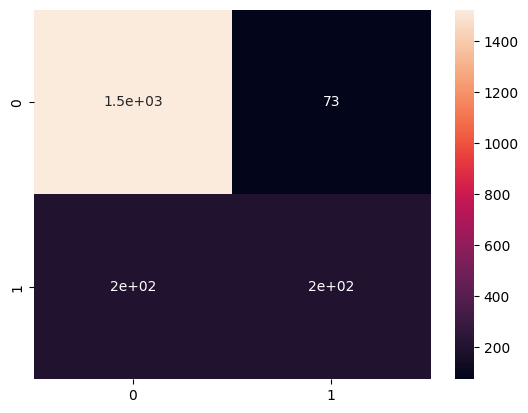

In [ ]:
# Display Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()